In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from EDMtoolkit import *
from modelSystems import *

%load_ext autoreload
%autoreload 2

# Linear Different Nonstationarity Types


In [2]:
def runSimulation(f, filename, N_replicates = 100, E_max = 8):
    results = np.array([get_delta_agg(f(), E_max, return_forecast_skill=True)
                        for i in range(int(N_replicates))])
    np.savetxt(f"{filename}.csv", results, fmt="%0.4f,%0.4f,%0.4f")

In [3]:
length = 200
E_max = 8
N_replicates = 100

In [9]:
# Stationary
def generate_stationary():
    theta = lambda t: np.pi / 6
    x0 = rand.random(1)[0] * 2 * np.pi
    return np.sin(theta(0) * np.arange(length) + x0) * np.sqrt(2) + rand.normal(0,0.1,length)

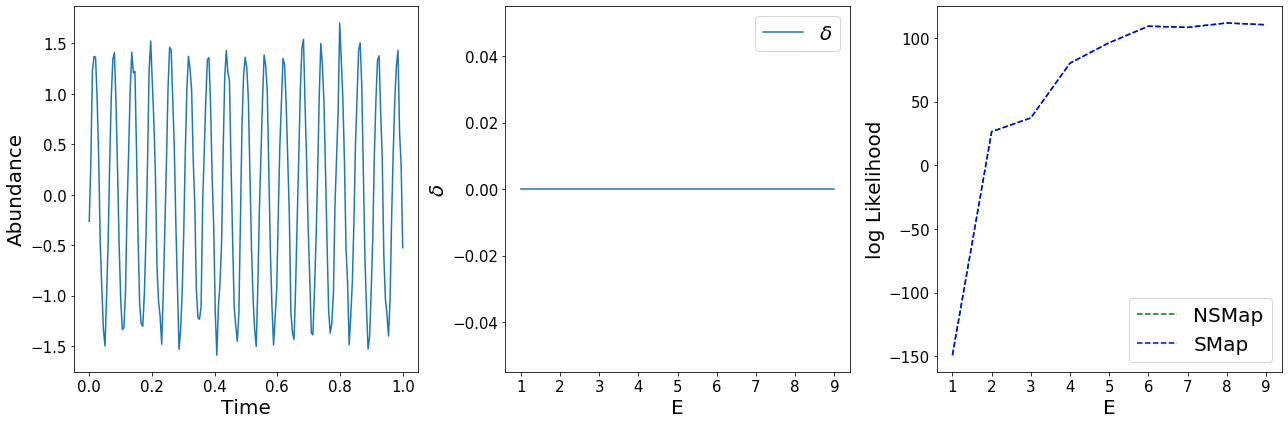

delta = 0.0, theta = 0.7627349333333331, r_sqrd = 0.9828908579847392


In [60]:
ts = generate_stationary()
delta, theta, r_sqrd = get_delta_agg(ts, E_max, return_forecast_skill=True, make_plots=True)
print(f"delta = {delta}, theta = {theta}, r_sqrd = {r_sqrd}")

In [74]:
runSimulation(generate_stationary, "linear_stationary")

In [8]:
# Mean Change

def generate_mean_change():
    x0 = rand.random(1)[0] * 2 * np.pi
    theta = np.pi / 6
    return np.sqrt(2) * np.sin(theta * np.arange(length) + x0) + np.linspace(0,1,num=length) + rand.normal(0, 0.1, length)

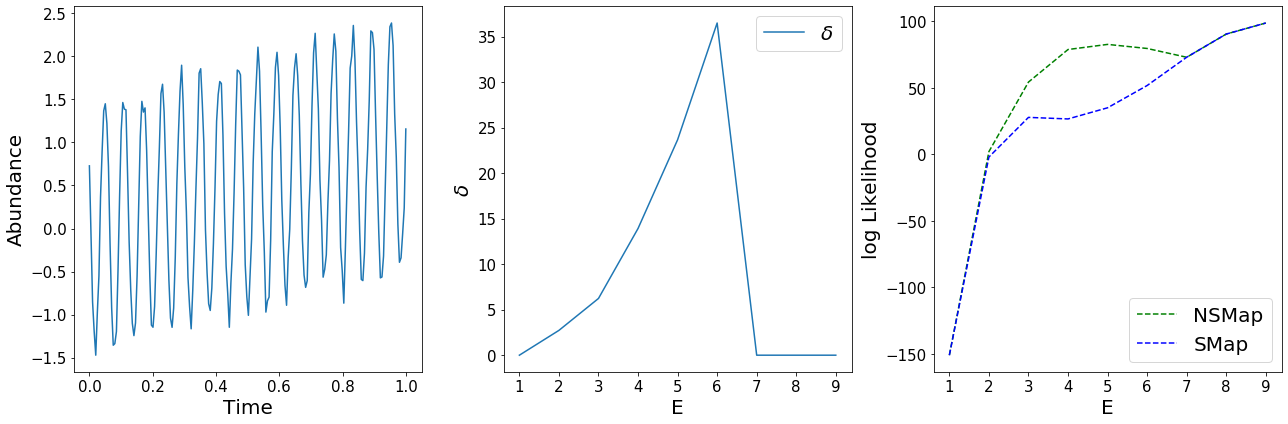

delta = 14.02565171135816, theta = 2.7919670865024534e-24, r_sqrd = 0.9820014308116463


In [66]:
ts = generate_mean_change()
delta, theta, r_sqrd = get_delta_agg(ts, E_max, return_forecast_skill=True, make_plots=True)
print(f"delta = {delta}, theta = {theta}, r_sqrd = {r_sqrd}")

In [75]:
runSimulation(generate_mean_change, "linear_mean_change")

In [7]:
# Speed Change
def generate_speed_change():
    x0 = rand.random(1)[0] * 2 * np.pi
    theta = lambda t: (0.5+t)*np.pi/6
    ts = np.sqrt(2) * np.sin(theta(np.linspace(0,1,num=length)) * np.arange(length) + x0) + rand.normal(0, 0.1, length)
    return ts

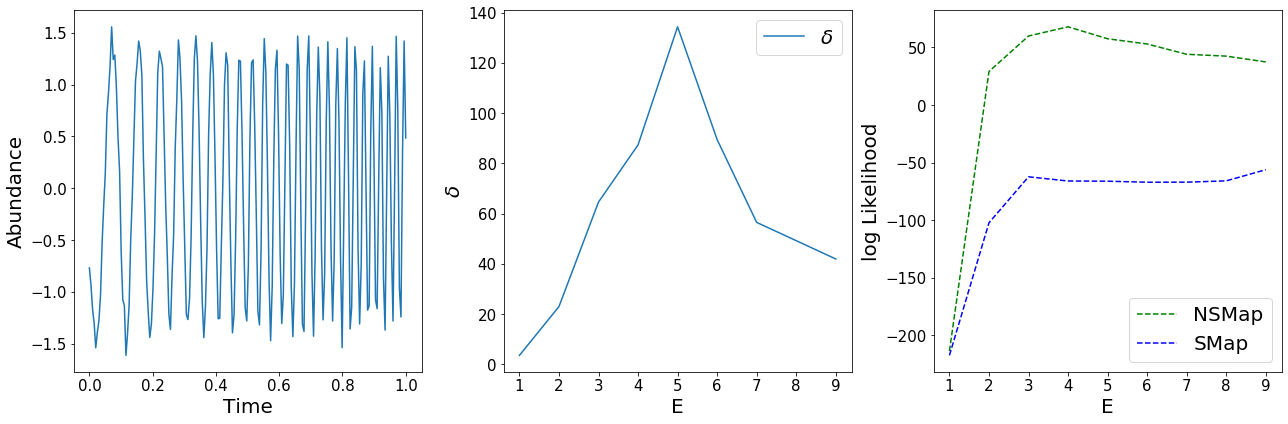

delta = 82.80980903615205, theta = 0.0, r_sqrd = 0.9758021178305637


In [69]:
ts = generate_speed_change()
delta, theta, r_sqrd = get_delta_agg(ts, E_max, return_forecast_skill=True, make_plots=True)
print(f"delta = {delta}, theta = {theta}, r_sqrd = {r_sqrd}")

In [76]:
runSimulation(generate_speed_change, "linear_speed_change")

In [6]:
def generate_variance_change():
    x0 = rand.random(1)[0] * 2 * np.pi
    theta = np.pi / 6 # (0.5+t)*np.pi/6
    # ts = np.linspace(0.1,1,num=length) * (np.sqrt(2) * np.sin(theta * np.arange(length)) + rand.normal(0, 0.1, length))
    # ts = np.array([rand.normal(0,v) for v in np.linspace(2,8,num=200)])
    ts = np.linspace(1,2,num=length) * np.sqrt(2) * np.sin(theta * np.arange(length) + x0) + rand.normal(0, 0.1, length)
    
    return ts

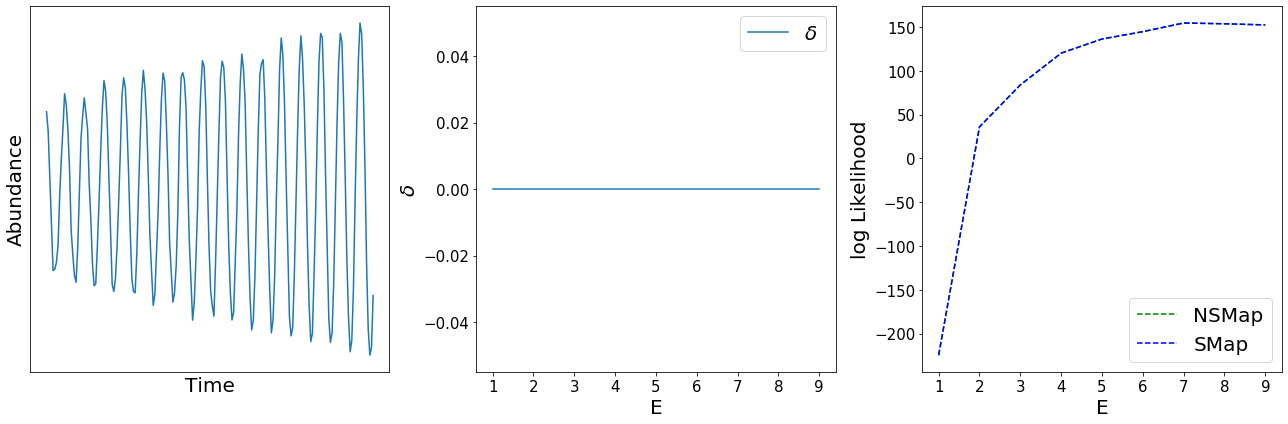

delta = 0.0, theta = 0.0, r_sqrd = 0.9953500274057409


In [86]:
ts = generate_variance_change()
delta, theta, r_sqrd = get_delta_agg(ts, E_max, return_forecast_skill=True, make_plots=True)
print(f"delta = {delta}, theta = {theta}, r_sqrd = {r_sqrd}")

In [87]:
runSimulation(generate_variance_change, "linear_variance_change")

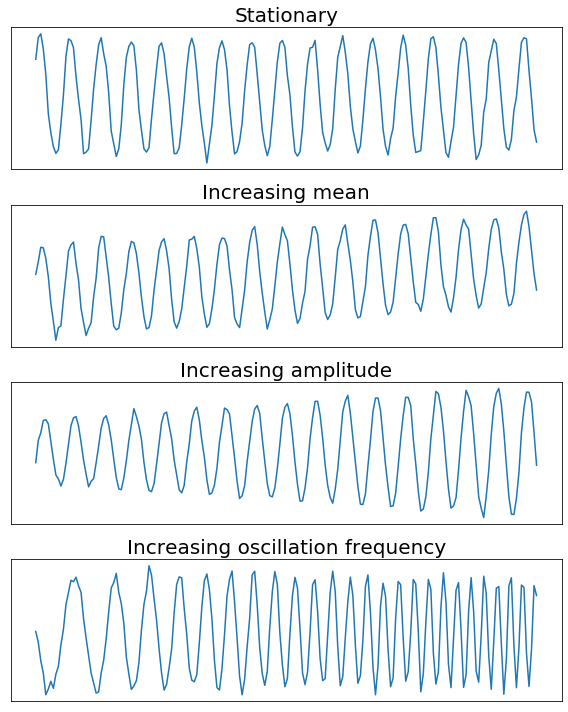

In [13]:
fig, ax = plt.subplots(4,figsize=(8,10))

ax[0].plot(generate_stationary())
ax[0].set_title("Stationary", fontsize = 20)
ax[1].plot(generate_mean_change())
ax[1].set_title("Increasing mean", fontsize = 20)
ax[2].plot(generate_variance_change())
ax[2].set_title("Increasing amplitude", fontsize = 20)
ax[3].plot(generate_speed_change())
ax[3].set_title("Increasing oscillation frequency", fontsize = 20)

for i in range(4):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.tight_layout()
# plt.savefig("../Figures/simulation_series_supplement/linear_series.png")
plt.savefig("../PDF_figures_tables/example_series/linear_series.pdf", format="pdf", bbox_inches="tight")